**ТЕОРЕТИЧЕСКИЕ ЗАДАНИЯ**

\begin{cases}
  u'_t + \frac{1}{\rho_0} p'_x = 0\\
  p'_t+\rho_0 c_0^2 u'_x = 0\\
  u(x, 0) = u_0(x)\\
  p(x, 0) = p_0(x)
\end{cases}


$$\bar q'_t + A \bar q'_x = 0$$

$$\begin{equation*}
{A} = \left(
\begin{array}{cc}
0 & \frac{1}{\rho_0}\\
\rho_0 c_0^2 & 0 
\end{array}
\right)
\end{equation*}$$

$$A = \Omega_R \Lambda \Omega_L$$

$$\Omega_R^{-1} = \Omega_L$$

$$\begin{equation*}
{\Lambda} = \left(
\begin{array}{cc}
c_0 & 0\\
0 & -c_0 
\end{array}
\right)
\end{equation*}$$

$$\begin{equation*}
{\Omega_L} = \left(
\begin{array}{cc}
\rho_0 c_0 & 1\\
\rho_0 c_0 & -1 
\end{array}
\right)
\end{equation*}$$

$$\bar q'_t + \Omega_R \Lambda \Omega_L \bar q'_x = 0$$

$$(\Omega_L \bar q)'_t + \Lambda (\Omega_L \bar q)'_x = 0$$

$$\bar s = \Omega_L \bar q = \left(
\begin{array}{c}
\rho_0 c_0 u + p\\
\rho_0 c_0 u - p
\end{array}
\right)$$

$$\bar s'_t + \Lambda \bar s'_x = 0$$

$$\begin{equation*}
\bar s = \left(
\begin{array}{c}
y\\
z
\end{array}
\right)
\end{equation*}$$

\begin{cases}
  y'_t + c_0 y'_x = 0\\
  z'_t - c_0 z'_x = 0\\
  y(x, 0) = \rho_0 c_0 u_0(x) + p_0(x)\\
  z(x, 0) = \rho_0 c_0 u_0(x) - p_0(x)
\end{cases}

$$\begin{equation*}
\bar q = \left(
\begin{array}{c}
u\\
p
\end{array}
\right) = \left(
\begin{array}{c}
\frac{y+z}{2\rho_0c_0}\\
\frac{y-z}{2}
\end{array}
\right)
\end{equation*}$$



<tr>
 <td> <img src='https://drive.google.com/uc?export=download&id=1CR7NfZ4xjGhfWV_7ZC145PnBN05IOJPu' width=600 height=300> </td>
</tr>


Вторая схема будет с характеристикой, направленной налево. 

Чтобы ничего не пересчитывать просто развернем среду и схему, тогда сведем задачу к предыдущей, просто надо поменять граничные условия и перевернуть просчитанный массив в конце.

**ПРАКТИЧЕСКИЕ ЗАДАНИЯ**

$u_L = 1$

$u_R = 0$

$p_L = 5$

$p_R = 2$

$\rho_0 = 0,25$

$c_0 = 2$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def shema(st, a, b, c, f):

  Y = np.zeros((TT, XX))
  X = np.zeros(XX)
  T = np.zeros(TT)

  for i in range(0, TT):
    Y[i][0] = st[0]
    T[i] = i*tau
  Y[0] = st
  for i in range(0, XX):
    X[i] = -1 + i*h

  for i in range(0, TT-1):
    for j in range(1, XX-1):
      Y[i+1][j] = -a*Y[i][j-1] - b*Y[i][j] - c*Y[i][j+1] - f*Y[i+1][j-1]
    Y[i+1][XX-1] = Y[i][XX-2]

  return X, Y

In [3]:
cur = 0.5
c = 2.0
h = 1e-2
tau = cur*h / c
XX = int(2/h)
TT = 101 

ul = 1.0
ur = 0.0
pl = 5.0
pr = 2.0
rho = 0.25

lst = np.zeros(XX)
rst = np.zeros(XX)

for i in range(0, XX):
  if (-1+i*h < 0):
    lst[i] = 5.5
  else: 
    lst[i] = 2.0

for i in range(0, XX):
  if (-1+i*h < 0):
    rst[i] = -2.0
  else: 
    rst[i] = -4.5


In [4]:
u0 = np.zeros(XX)
for i in range(0, XX):
  if (i*h < 1):
    u0[i] = ul
  else:
    u0[i] = ur

p0 = np.zeros(XX)
for i in range(0, XX):
  if (i*h < 1):
    p0[i] = pl
  else:
    p0[i] = pr

uu = u0
pp = p0
for i in range(50, XX-50):
  uu[i] = (u0[i-50]+u0[i+50])/2 + (p0[i-50]-p0[i+50])/2/rho/c
  pp[i] = (p0[i-50]+p0[i+50])/2 + (u0[i-50]-u0[i+50])*(rho*c/2)


**Задание 1**

In [5]:
Xl, Yl = shema(lst, -1/2, -1/2, 0, 0)
Xr, Yr = shema(rst, -1/2, -1/2, 0, 0)

u = (Yl[100]+np.flip(Yr[100]))/2/rho/c
p = (Yl[100]-np.flip(Yr[100]))/2

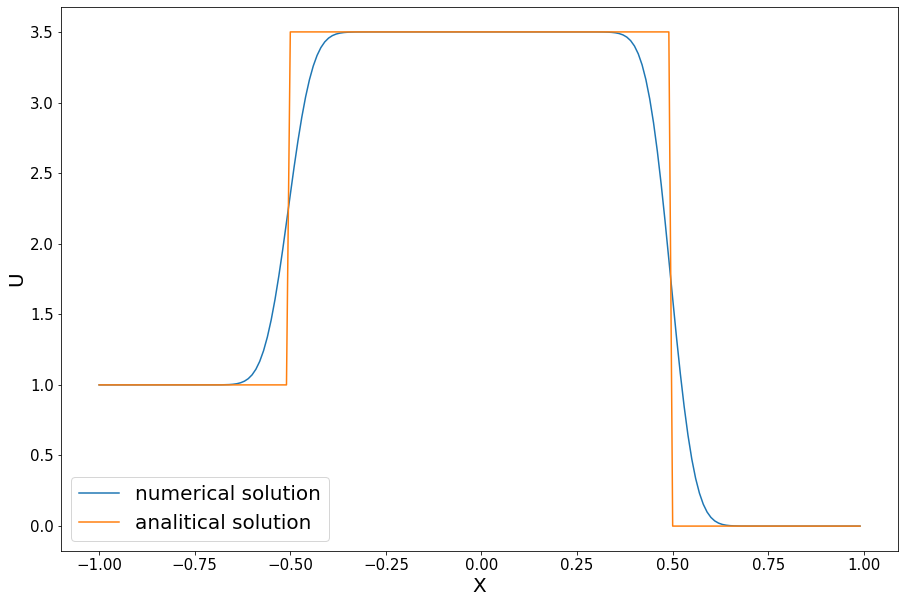

In [6]:
plt.figure(figsize = (15, 10))
plt.plot(Xl, u, label='numerical solution')
plt.plot(Xl, uu, label='analitical solution')
plt.xlabel('X', fontsize=20)
plt.ylabel('U', fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

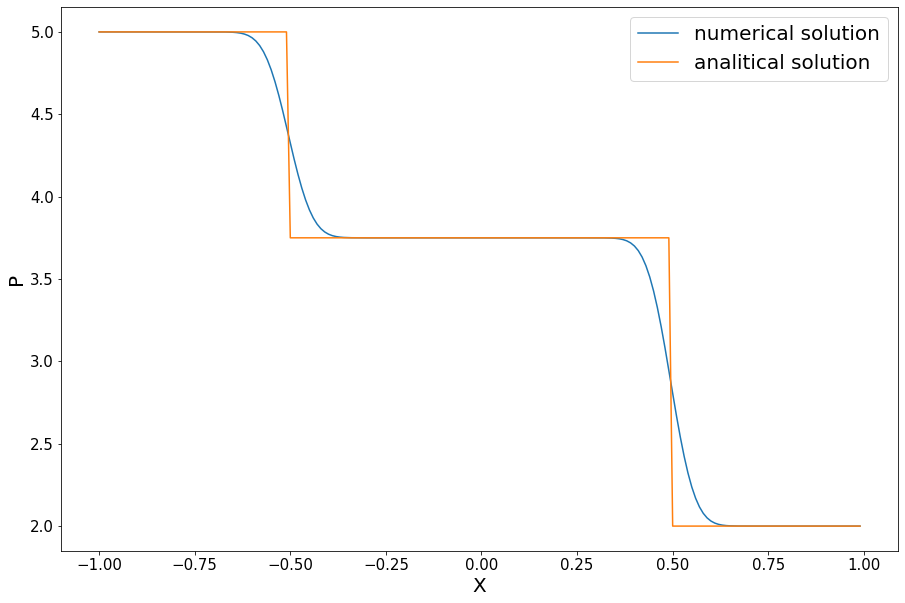

In [7]:
plt.figure(figsize = (15, 10))
plt.plot(Xl, p, label='numerical solution')
plt.plot(Xl, pp, label='analitical solution')
plt.xlabel('X', fontsize=20)
plt.ylabel('P', fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

**Задание 2**

In [8]:
Xl, Yl = shema(lst, -84/109, -53/109, 5/109, 23/109)
Xr, Yr = shema(rst, -84/109, -53/109, 5/109, 23/109)

u = (Yl[100]+np.flip(Yr[100]))/2/rho/c
p = (Yl[100]-np.flip(Yr[100]))/2

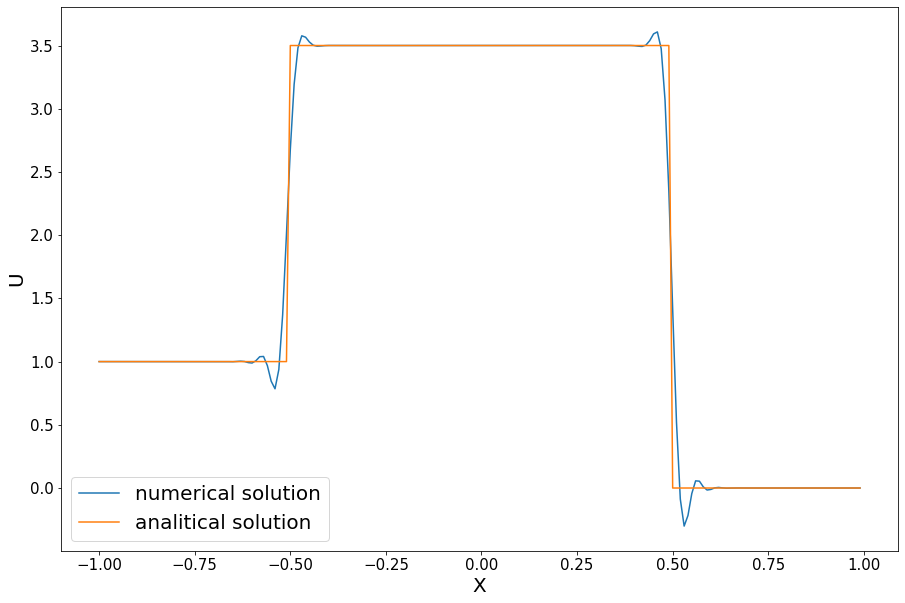

In [9]:
plt.figure(figsize = (15, 10))
plt.plot(Xl, u, label='numerical solution')
plt.plot(Xl, uu, label='analitical solution')
plt.xlabel('X', fontsize=20)
plt.ylabel('U', fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

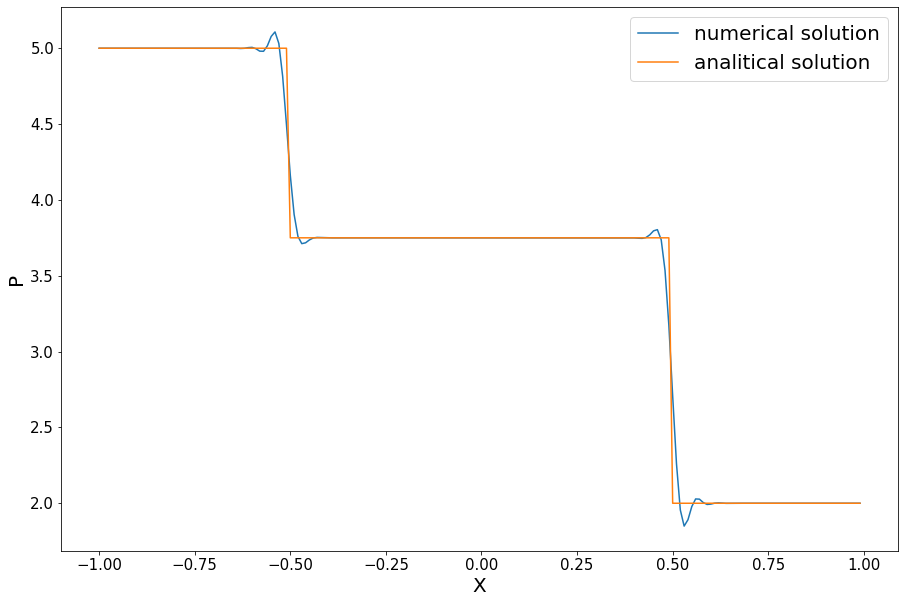

In [10]:
plt.figure(figsize = (15, 10))
plt.plot(Xl, p, label='numerical solution')
plt.plot(Xl, pp, label='analitical solution')
plt.xlabel('X', fontsize=20)
plt.ylabel('P', fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

**Задание 3**

In [11]:
def gibrid(st):
  Y = np.zeros((TT, XX))
  X = np.zeros(XX)
  T = np.zeros(TT)

  for i in range(0, TT):
    Y[i][0] = st[0]
    T[i] = i*tau
  Y[0] = st
  for i in range(0, XX):
    X[i] = -1 + i*h

  for i in range(0, TT-1):
    for j in range(1, XX-1):
      res1 = 1*Y[i][j-1] + 1/3*Y[i][j] + 0*Y[i][j+1] - 1/3*Y[i+1][j-1]
      res2 = 0*Y[i][j-1] + 1*Y[i][j] - 1/5*Y[i][j+1] + 1/5*Y[i+1][j-1]
      res3 = 3/4*Y[i][j-1] + 1/2*Y[i][j] - 1/20*Y[i][j+1] - 1/5*Y[i+1][j-1]

      if ((min(Y[i-1][j], Y[i][j]) <= res1) and (res1 <= max(Y[i-1][j], Y[i][j]))):
        Y[i+1][j] = res1
      elif ((min(Y[i-1][j], Y[i][j]) <= res2) and (res2 <= max(Y[i-1][j], Y[i][j]))):
        Y[i+1][j] = res2
      else:
        Y[i+1][j] = res3
    Y[i+1][XX-1] = Y[i][XX-2]

  return X, Y

In [12]:
Xl, Yl = gibrid(lst)
Xr, Yr = gibrid(rst)

u = (Yl[100]+np.flip(Yr[100]))/2/rho/c
p = (Yl[100]-np.flip(Yr[100]))/2

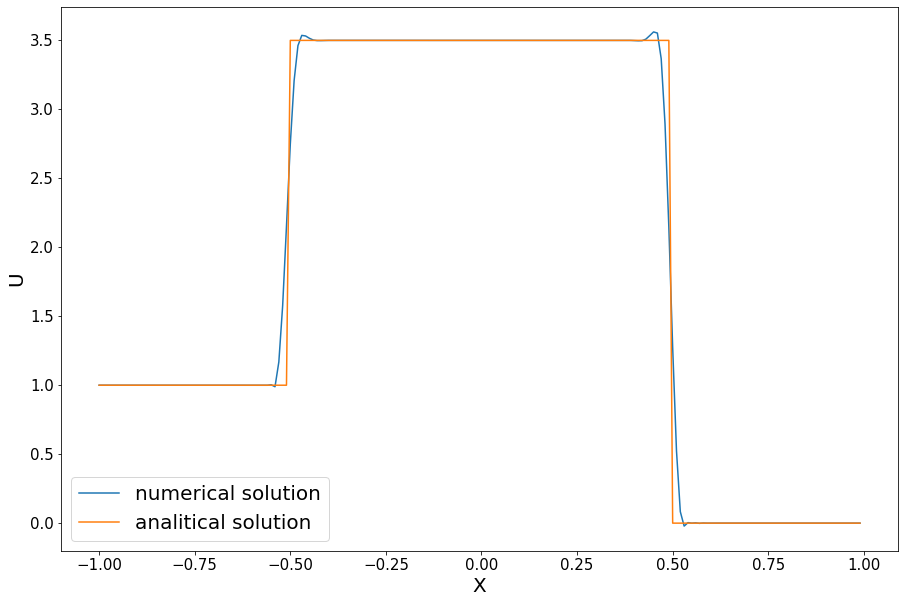

In [13]:
plt.figure(figsize = (15, 10))
plt.plot(Xl, u, label='numerical solution')
plt.plot(Xl, uu, label='analitical solution')
plt.xlabel('X', fontsize=20)
plt.ylabel('U', fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

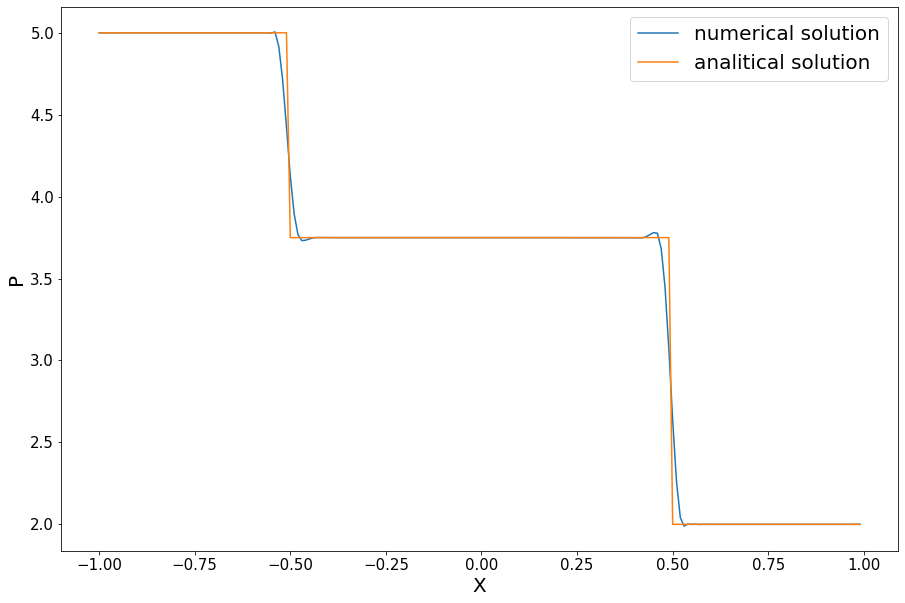

In [14]:
plt.figure(figsize = (15, 10))
plt.plot(Xl, p, label='numerical solution')
plt.plot(Xl, pp, label='analitical solution')
plt.xlabel('X', fontsize=20)
plt.ylabel('P', fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()